In [1]:
from IPython.display import Image, display


Displaying image: apple.jpg


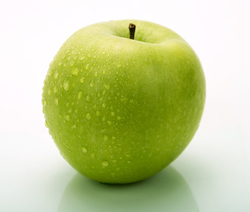


Displaying image: clock.jpg


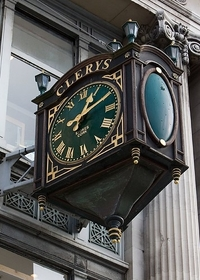


Displaying image: oranges.jpg


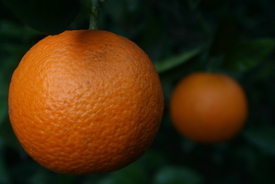


Displaying image: car.jpg


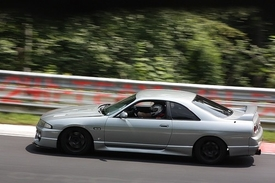

In [2]:
image_files = [
    'apple.jpg',
    'clock.jpg',
    'oranges.jpg',
    'car.jpg'
]

for image_file in image_files:
    print(f"\nDisplaying image: {image_file}")
    display(Image(filename=f"images/{image_file}"))

In [3]:
import os

dir_name = "images_with_boxes"
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

In [4]:
import cv2
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import cvlib as cv
from cvlib.object_detection import draw_bbox

def detect_and_mark_bbox(input_file_name, model="yolov3-tiny", confidence=0.5):
    img_file_path = f'images/{input_file_name}'
    image = cv2.imread(img_file_path)

    bbox, label, conf = cv.detect_common_objects(image, confidence=confidence, model=model)

    print("Image ", input_file_name, " processed successfully")

    for o, c in zip(label, conf):
        print(f"Detected object: {o} with confidence score: {c}\n")

    labelled_image = draw_bbox(image, bbox, label, conf)

    cv2.imwrite(f'images_with_boxes/{input_file_name}', labelled_image)

    display(Image(f'images_with_boxes/{input_file_name}'))

Image  apple.jpg  processed successfully
Detected object: apple with confidence score: 0.5717183351516724



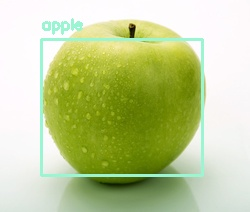

Image  clock.jpg  processed successfully
Detected object: clock with confidence score: 0.968317985534668



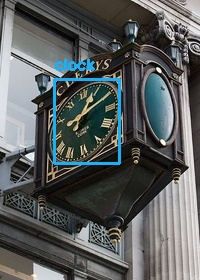

Image  oranges.jpg  processed successfully
Detected object: orange with confidence score: 0.6185599565505981

Detected object: orange with confidence score: 0.5561732053756714



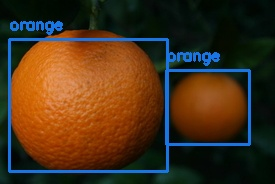

Image  car.jpg  processed successfully
Detected object: car with confidence score: 0.6325422525405884



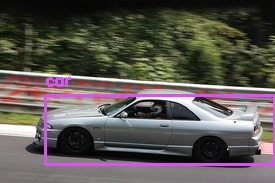

In [5]:
for image_file in image_files:
    detect_and_mark_bbox(image_file)

Image  fruits.jpg  processed successfully
Detected object: apple with confidence score: 0.5818485617637634

Detected object: orange with confidence score: 0.5346476435661316

Detected object: orange with confidence score: 0.5150948166847229



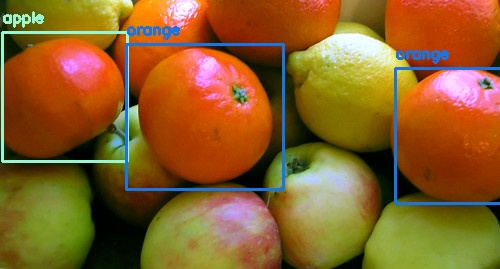

In [6]:
detect_and_mark_bbox('fruits.jpg')

Image  fruits.jpg  processed successfully
Detected object: apple with confidence score: 0.5818485617637634

Detected object: orange with confidence score: 0.5346476435661316

Detected object: orange with confidence score: 0.5150948166847229

Detected object: apple with confidence score: 0.3476020395755768

Detected object: orange with confidence score: 0.32876279950141907

Detected object: apple with confidence score: 0.3124457597732544

Detected object: orange with confidence score: 0.27985894680023193

Detected object: orange with confidence score: 0.27499887347221375

Detected object: apple with confidence score: 0.2744504511356354

Detected object: orange with confidence score: 0.21419422328472137



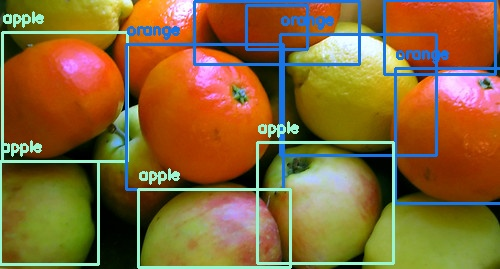

In [7]:
detect_and_mark_bbox('fruits.jpg', confidence=0.2)

In [8]:
dir_name = "images_uploaded"
if not os.path.exists(dir_name):
    os.mkdir(dir_name)

In [9]:
import io
import uvicorn
import numpy as np
import nest_asyncio
from enum import Enum
from fastapi import FastAPI, UploadFile, File, HTTPException
from fastapi.responses import StreamingResponse

In [10]:
app = FastAPI(title="Demo Deployment of the model")

class Model(str, Enum):
    yolov3tiny = "yolov3-tiny"
    yolov3 = "yolov3"

@app.get('/')
def home():
    return "working..."

@app.get('/predict')
def predict(model: Model, file: UploadFile = File(...)):
    filename = file.filename
    # fileExtension = file.split(".")[-1] in ("jpg", "png", "jpeg")
    # if not fileExtension:
    #     raise HTTPException(status_code=415, detail="Unsupported file provided.")
    
    image_stream = io.BytesIO(file.file.read())
    image_stream.seek(0)

    file_bytes = np.asarray(bytearray(image_stream.read()), dtype=np.uint8)

    image = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)

    bbox, label, conf = cv.detect_common_objects(image, confidence=0.3, model=model)

    output_labelled_image = draw_bbox(image, bbox, label, conf)

    cv2.imwrite(f'images_uploaded/{filename}', output_labelled_image)

    file_image = open(f'images_uploaded/{filename}', mode="rb")

    return StreamingResponse(file_image, media_type="image/jpeg")

In [11]:
nest_asyncio.apply()

host = '127.0.0.1'

uvicorn.run(app, host=host, port=8000, root_path="/serve")

INFO:     Started server process [10076]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:65187 - "GET /serve/predict?model=yolov3-tiny HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [10076]


KeyboardInterrupt: 